In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

First, we load our data files. These include the filtered summary report of lineages and sample-level metadata.

In [6]:
mdf = pd.read_csv("public-2022-12-11.autolineages.metadata.tsv",sep='\t')
def get_date(d):
    try:
        return dt.datetime.strptime(d,"%Y-%m-%d")
    except:
        return np.nan
mdf['date'] = mdf.date.apply(get_date)
mdf

,strain,genbank_accession,date,country,host,completeness,length,Nextstrain_clade,pangolin_lineage,Nextstrain_clade_usher,pango_lineage_usher,auto_annotation
0,AUS/QIMR03/2022|OP604184.2|2022-07-19,OP604184.2,2022-07-19,Australia,Homo sapiens,NaN,29827.0,22B (Omicron),BE.1,22B (Omicron),BE.1,auto.BE.1.5
1,BHR/22020388066/2022|OP001951.1|2022-07-12,OP001951.1,2022-07-12,Bahrain,Homo sapiens,NaN,29590.0,22B (Omicron),BA.5,22B (Omicron),BA.5.2_no28330,auto.BA.5.2_no28330.1
2,BHR/22020388912/2022|OP001907.1|2022-07-12,OP001907.1,2022-07-12,Bahrain,Homo sapiens,NaN,29548.0,22B (Omicron),BA.5,22B (Omicron),BA.5.2_no28330,auto.BA.5.2_no28330.1
3,BHR/22020398914/2022|OP114028.1|2022-07-14,OP114028.1,2022-07-14,Bahrain,Homo sapiens,NaN,29423.0,22B (Omicron),BA.5,22B (Omicron),BA.5.2_no28330,auto.BA.5.2_no28330.1
4,BHR/22020406398/2022|OP114422.1|2022-07-22,OP114422.1,2022-07-22,Bahrain,Homo sapiens,NaN,29767.0,22B (Omicron),BA.5,22B (Omicron),BA.5.2_no28330,auto.BA.5.2_no28330.1
...,...,...,...,...,...,...,...,...,...,...,...,...
31015,ZAF/NHLS-UCT-PA-J077/2022|OP862915.1|2022-10-19,OP862915.1,2022-10-19,South Africa,Homo sapiens,NaN,29728.0,22B (Omicron),BA.5,22B (Omicron),BA.5.11,auto.BA.5.11.1
31016,ZAF/NHLS-UCT-PA-J102/2022|OP862937.1|2022-10-18,OP862937.1,2022-10-18,South Africa,Homo sapiens,NaN,29719.0,22B (Omicron),BA.5,22B (Omicron),BA.5.11,auto.BA.5.11.1
31017,ZAF/NHLS-UCT-PA-J108/2022|OP862942.1|2022-10-17,OP862942.1,2022-10-17,South Africa,Homo sapiens,NaN,29728.0,22B (Omicron),BA.5,22B (Omicron),BA.5.11,auto.BA.5.11.1
31018,ZAF/NHLS-UCT-PA-J110/2022|OP862944.1|2022-10-18,OP862944.1,2022-10-18,South Africa,Homo sapiens,NaN,29728.0,22B (Omicron),BA.5,22B (Omicron),BA.5.11,auto.BA.5.11.1


In [8]:
rdf = pd.read_csv("public-2022-12-11.pullreq.report.tsv",sep='\t').set_index("Lineage Name")
rdf

,Parent Lineage,Size,Exponential Growth Coefficient CI,Earliest Appearance,Latest Appearance,Regions,Nucleotide Changes,Amino Acid Changes,View On Cov-Spectrum,View On Taxonium (Public Samples Only)
Lineage Name,,,,,,,,,,
auto.CH.1.1.3,CH.1.1,32,[0.08748608 0.4951806 ],2022-10-17,2022-12-05,England,"C21811T,G13441A,C28093T",ORF8:S67F,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BQ.1.5.1,BQ.1.5,71,[0.06241119 0.2452691 ],2022-10-16,2022-12-05,USA and England,"T8200C,G25855T,C823T",ORF3a:D155Y,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BQ.1.10.2,BQ.1.10,55,[0.01600151 0.28681758],2022-10-17,2022-12-04,USA and England,"A1320C,C9286T,C3040T",ORF1ab:E352A,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BQ.1.1.24.1,BQ.1.1.24,102,[0.00128919 0.1943545 ],2022-11-01,2022-12-03,England,"G25459T,C5407T",ORF3a:A23S,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BQ.1.1.12,BQ.1.1,176,[-0.0311836 0.0798779],2022-10-16,2022-12-03,"USA, Scotland, and England","C25821T,C19547T",ORF1ab:S6428L,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BN.1.4.1,BN.1.4,183,[-0.0588962 0.04389914],2022-10-16,2022-12-03,"England, USA, and Scotland","G10364A,C14318T","ORF1ab:V3367I,ORF1ab:T4685I",[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BQ.1.8.3,BQ.1.8,109,[-0.06416942 0.03928937],2022-10-17,2022-12-03,England and Northern Ireland,A21137G,ORF1ab:K6958R,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BQ.1.1.13.1,BQ.1.1.13,65,[-0.08976741 0.18956378],2022-10-21,2022-12-04,Scotland and England,G13822A,ORF1ab:V4520I,[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...
auto.BA.5.1.13,BA.5.1,299,[-0.09928929 -0.06715817],2022-10-16,2022-12-05,England and USA,"C28567T,G15451A,G25352T,A4595G","ORF1ab:T1444A,ORF1ab:G5063S,S:V1264L",[View On Cov-Spectrum](https://cov-spectrum.or...,[View On Taxonium (Public Samples Only)](https...


To prepare our data for analysis, we perform some grouping and counting on the sample-level metadata to generate a weekly, geographically stratified statistical summary of sample presence for each lineage.

In [10]:
vdf = mdf.groupby(['country','auto_annotation',pd.Grouper(key='date', freq='1W')]).strain.count().reset_index()
vdf = vdf.rename({"strain":"count"},axis=1).sort_values("date")
cc = vdf.groupby(["date","country"])['count'].sum().to_dict()
vdf['country_count'] = vdf.apply(lambda row:cc.get((row.date,row.country)),axis=1)
vdf['country_perc'] = vdf['count'] / vdf.country_count
vdf.sort_values(['auto_annotation','country','date'],inplace=True)
vdf

,country,auto_annotation,date,count,country_count,country_perc
123,England,auto.BA.2.3.3,2022-10-02,2,368,0.005435
124,England,auto.BA.2.3.3,2022-10-09,7,547,0.012797
125,England,auto.BA.2.3.3,2022-10-16,9,513,0.017544
126,England,auto.BA.2.3.3,2022-10-23,16,540,0.029630
127,England,auto.BA.2.3.3,2022-10-30,16,432,0.037037
...,...,...,...,...,...,...
1134,England,auto.XBG.1,2022-10-23,1,540,0.001852
1135,England,auto.XBG.1,2022-10-30,10,432,0.023148
1136,England,auto.XBG.1,2022-11-06,1,298,0.003356
1137,England,auto.XBG.1,2022-11-13,3,302,0.009934


We also define a simple exponential growth equation for use in visualization.

In [11]:
def get_line_data(initial,growth_coeff,size=10,start=0):
    return [0 for i in range(0,start)] + [np.e**(np.log(initial) + growth_coeff*s) for s in range(start, size)]
get_line_data(1/500,0.07)

[0.0020000000000000013,
 0.0021450163625084348,
 0.002300547597714455,
 0.002467356119913488,
 0.0026462596246748763,
 0.0028381350971865152,
 0.0030439231112372694,
 0.0032646324399107605,
 0.0035013450005922063,
 0.003755221158528688]

Notably, we also must convert raw week data for each timepoint, location and lineage to the time in weeks since the lineage in question was first detected in the given location. This is necessary to make growth curves with different initial timepoints comparable.

In [12]:
postrack = {}
for mi, sdf in vdf.sort_values('date').groupby(['auto_annotation','country']):
    i = 0
    for date in sdf.date:
        postrack[(mi[0],mi[1],date)] = i
        i += 1
# postrack
vdf['country_date_position'] = vdf.apply(lambda row:postrack[(row.auto_annotation,row.country,row.date)],axis=1)
vdf

,country,auto_annotation,date,count,country_count,country_perc,country_date_position
123,England,auto.BA.2.3.3,2022-10-02,2,368,0.005435,0
124,England,auto.BA.2.3.3,2022-10-09,7,547,0.012797,1
125,England,auto.BA.2.3.3,2022-10-16,9,513,0.017544,2
126,England,auto.BA.2.3.3,2022-10-23,16,540,0.029630,3
127,England,auto.BA.2.3.3,2022-10-30,16,432,0.037037,4
...,...,...,...,...,...,...,...
1134,England,auto.XBG.1,2022-10-23,1,540,0.001852,0
1135,England,auto.XBG.1,2022-10-30,10,432,0.023148,1
1136,England,auto.XBG.1,2022-11-06,1,298,0.003356,2
1137,England,auto.XBG.1,2022-11-13,3,302,0.009934,3


We can now proceed to fit our model.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [initial_proportion, growth]
Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 21 seconds.
The number of effective samples is smaller than 25% for some parameters.
/var/folders/29/246fq4bj2810hwd_464xqryh0000gn/T/ipykernel_75351/2843979288.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Week " + str(xt).split(".")[0] for xt in ax.get_xticks()])


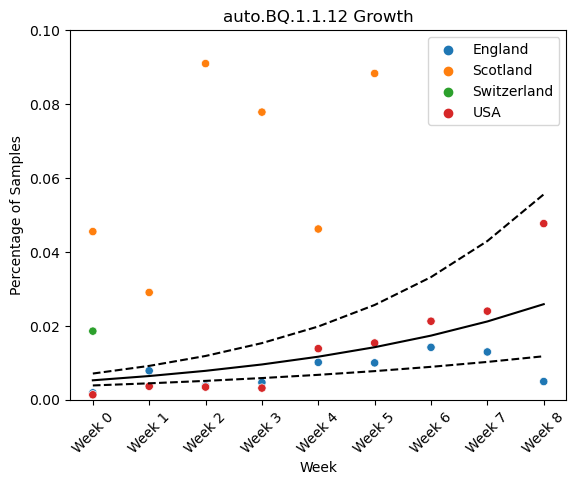

In [13]:
def plot_growth_model(target,idata=None,save=False,split_country=False,maxperc=.1,ax=None):
    #reshape the summary table.
    tdata = vdf[(vdf.auto_annotation == target) & (vdf.country_perc <= maxperc)]
    X_week = []
    X_country_week_total = []
    Y = []
    #start with one annotation as a test.
    for keys, sdf in tdata.groupby(['country']):
        sdf = sdf.sort_values('date').reset_index()
        #skip country/lineage pairs which don't have at least two weeks. Single weeks can only be used for initial proportion inference and are not generally useful.
        if sdf.shape[0] >= 2:
            for i,d in sdf.iterrows():
                X_week.append(i)
                X_country_week_total.append(d.country_count)
                Y.append(d['count'])
    #if inference data wasn't passed, create it with PyMC3.
    if idata == None:
        with pm.Model() as model:
            growth = pm.Normal(name='growth', sd=5)
            initial_proportion = pm.TruncatedNormal(name='initial_proportion',upper=1,lower=0)
            #cap the initial proportion value at 1 (100%) and log it for use. 
            #This value will be informed for week 0 of a set of values. It should vary across countries, but not by too much.
            log_initial_proportion = pm.Deterministic(name="log_initial_proportion",var=np.log(initial_proportion))
            #estimate our expected proportion for this week, given our initial proportion and week. correct it back by exponentiation.
            current_proportion = pm.Deterministic(name='base_proportion', var = np.e**(log_initial_proportion + growth * X_week))
            #sampling process with our actual observed values.
            y_obs = pm.Binomial(name='sampled', n=X_country_week_total, p=current_proportion, observed=Y)
            #perform the actual inference process.
            idata = pm.sample(draws=1000,tune=1500,progressbar=False,return_inferencedata=True,target_accept=.9)
    #prepare plotting data.
    x = tdata.country_date_position.value_counts().index.to_series().sort_values().values
    xd = tdata.groupby("country").country_date_position.min()
    i1,i2,i3 = idata.posterior.initial_proportion.quantile([0.05,0.5,0.95]).values
    c1,c2,c3 = idata.posterior.growth.quantile([0.05,0.5,0.95]).values
    y1 = get_line_data(i1,c1,len(x))
    y2 = get_line_data(i2,c2,len(x))
    y3 = get_line_data(i3,c3,len(x))
    #proceed to the plotting.
    sns.lineplot(x=x,y=y1,color='black',linestyle='--')
    sns.lineplot(x=x,y=y2,color='black')
    sns.lineplot(x=x,y=y3,color='black',linestyle='--')
    ax = sns.scatterplot(x='country_date_position',y='country_perc',hue='country',data=tdata)
    ax.set_ylim([0,maxperc])
    plt.xticks(rotation=45)
    ax.set_xlabel("Week")
    ax.set_xticklabels(["Week " + str(xt).split(".")[0] for xt in ax.get_xticks()])
    ax.set_ylabel("Percentage of Samples")
    plt.title(target + " Growth")
    plt.legend()
    if save:
        plt.savefig(target + "_growthplot.png")
    else:
        plt.show()
    
    return idata
idata = plot_growth_model('auto.BQ.1.1.12')

array([[<AxesSubplot: title={'center': 'growth'}>,
        <AxesSubplot: title={'center': 'growth'}>],
       [<AxesSubplot: title={'center': 'initial_proportion'}>,
        <AxesSubplot: title={'center': 'initial_proportion'}>],
       [<AxesSubplot: title={'center': 'log_initial_proportion'}>,
        <AxesSubplot: title={'center': 'log_initial_proportion'}>],
       [<AxesSubplot: title={'center': 'base_proportion'}>,
        <AxesSubplot: title={'center': 'base_proportion'}>]], dtype=object)

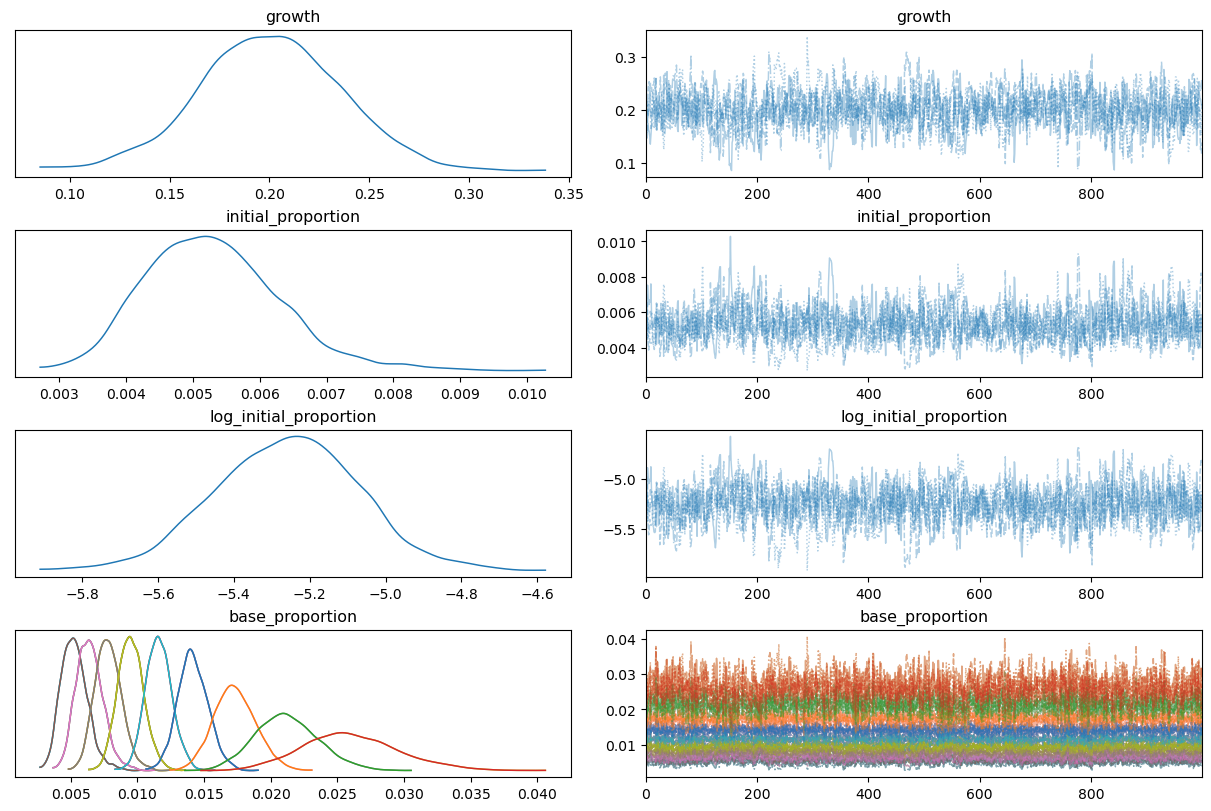

In [14]:
az.plot_trace(idata, combined=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [initial_proportion, growth]
Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
The number of effective samples is smaller than 25% for some parameters.
/var/folders/29/246fq4bj2810hwd_464xqryh0000gn/T/ipykernel_75351/2843979288.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Week " + str(xt).split(".")[0] for xt in ax.get_xticks()])


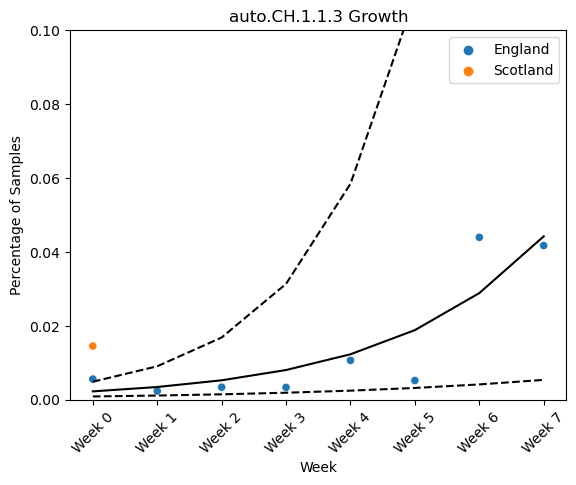

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [initial_proportion, growth]
Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
The number of effective samples is smaller than 25% for some parameters.
/var/folders/29/246fq4bj2810hwd_464xqryh0000gn/T/ipykernel_75351/2843979288.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Week " + str(xt).split(".")[0] for xt in ax.get_xticks()])


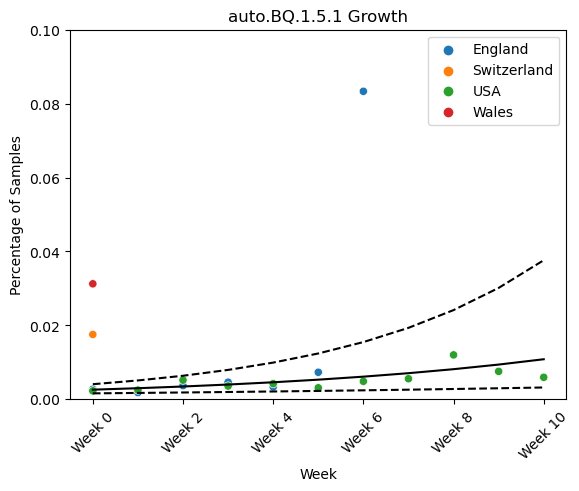

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [initial_proportion, growth]
Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
The number of effective samples is smaller than 25% for some parameters.
/var/folders/29/246fq4bj2810hwd_464xqryh0000gn/T/ipykernel_75351/2843979288.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Week " + str(xt).split(".")[0] for xt in ax.get_xticks()])


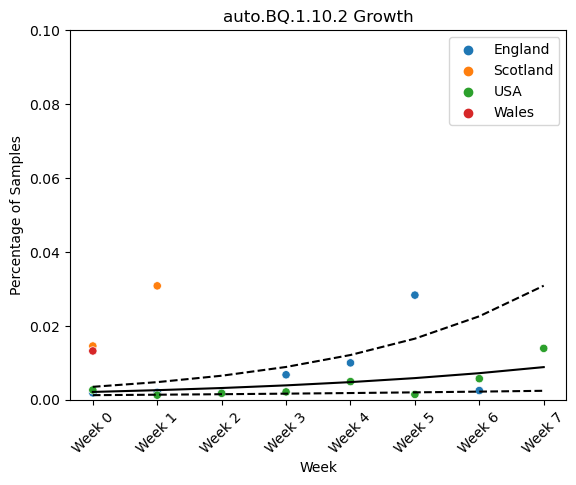

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [initial_proportion, growth]
Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
The number of effective samples is smaller than 25% for some parameters.
/var/folders/29/246fq4bj2810hwd_464xqryh0000gn/T/ipykernel_75351/2843979288.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Week " + str(xt).split(".")[0] for xt in ax.get_xticks()])


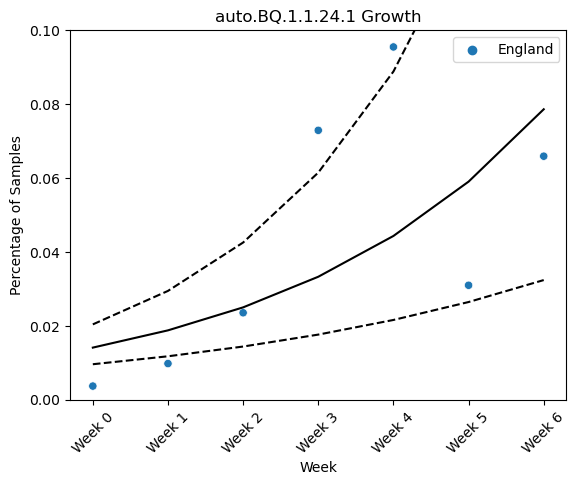

In [16]:
for aa in rdf.index[:4]:
    plot_growth_model(aa,save=True)
    plt.show()
